In [18]:
import numpy as np
import matplotlib.pyplot as plt

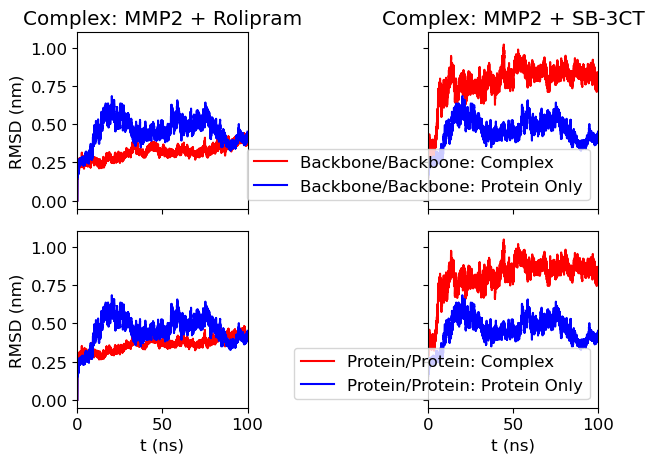

In [19]:
import matplotlib
import matplotlib.ticker as mtick
matplotlib.rc('font', size=12)
fs = 12

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, tight_layout=True)
for ax in axs.flatten():
    ax.set_xlim(0,100)


ax1, ax2 = axs[0]
ax1.set_title('Complex: MMP2 + Rolipram')
ax2.set_title('Complex: MMP2 + SB-3CT')

fname = "MMP2_Rolipram/post-processing/Complex/rmsd_bb.xvg"
t1, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax1.plot(t1,rms, color="red", label="Backbone/Backbone: Complex")

fname = "MMP2_Rolipram/post-processing/MMP2/md_rmsd_longer.xvg"
t1, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax1.plot(t1,rms, color="blue", label="Backbone/Backbone Protein Only")

fname = "MMP2_sb3ct/post-processing/Complex/rmsd_bb.xvg"
t2, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax2.plot(t2,rms, color="red", label="Backbone/Backbone: Complex")

fname = "MMP2_Rolipram/post-processing/MMP2/md_rmsd_longer.xvg"
t2, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax2.plot(t2,rms, color="blue", label="Backbone/Backbone: Protein Only")
ax2.legend(loc='lower right')


ax3, ax4 = axs[1]

fname = "MMP2_Rolipram/post-processing/Complex/rmsd_pp.xvg"
t1, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax3.plot(t1,rms, color="red", label="Protein/Protein: Complex")

fname = "MMP2_Rolipram/post-processing/MMP2/md_rmsd_longer.xvg"
t1, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax3.plot(t1,rms, color="blue", label="Protein/Protein: Protein Only")

fname = "MMP2_sb3ct/post-processing/Complex/rmsd_pp.xvg"
t2, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax4.plot(t2,rms, color="red", label="Protein/Protein: Complex")

fname = "MMP2_Rolipram/post-processing/MMP2/md_rmsd_longer.xvg"
t2, rms = np.loadtxt(fname, comments=['#','@'], unpack=True)
ax4.plot(t2,rms, color="blue", label="Protein/Protein: Protein Only")

ax4.legend(loc='lower right')

for ax in (ax1, ax3):
    ax.set_ylabel("RMSD (nm)")

for ax in (ax3, ax4):
    ax.set_xlabel('t (ns)')


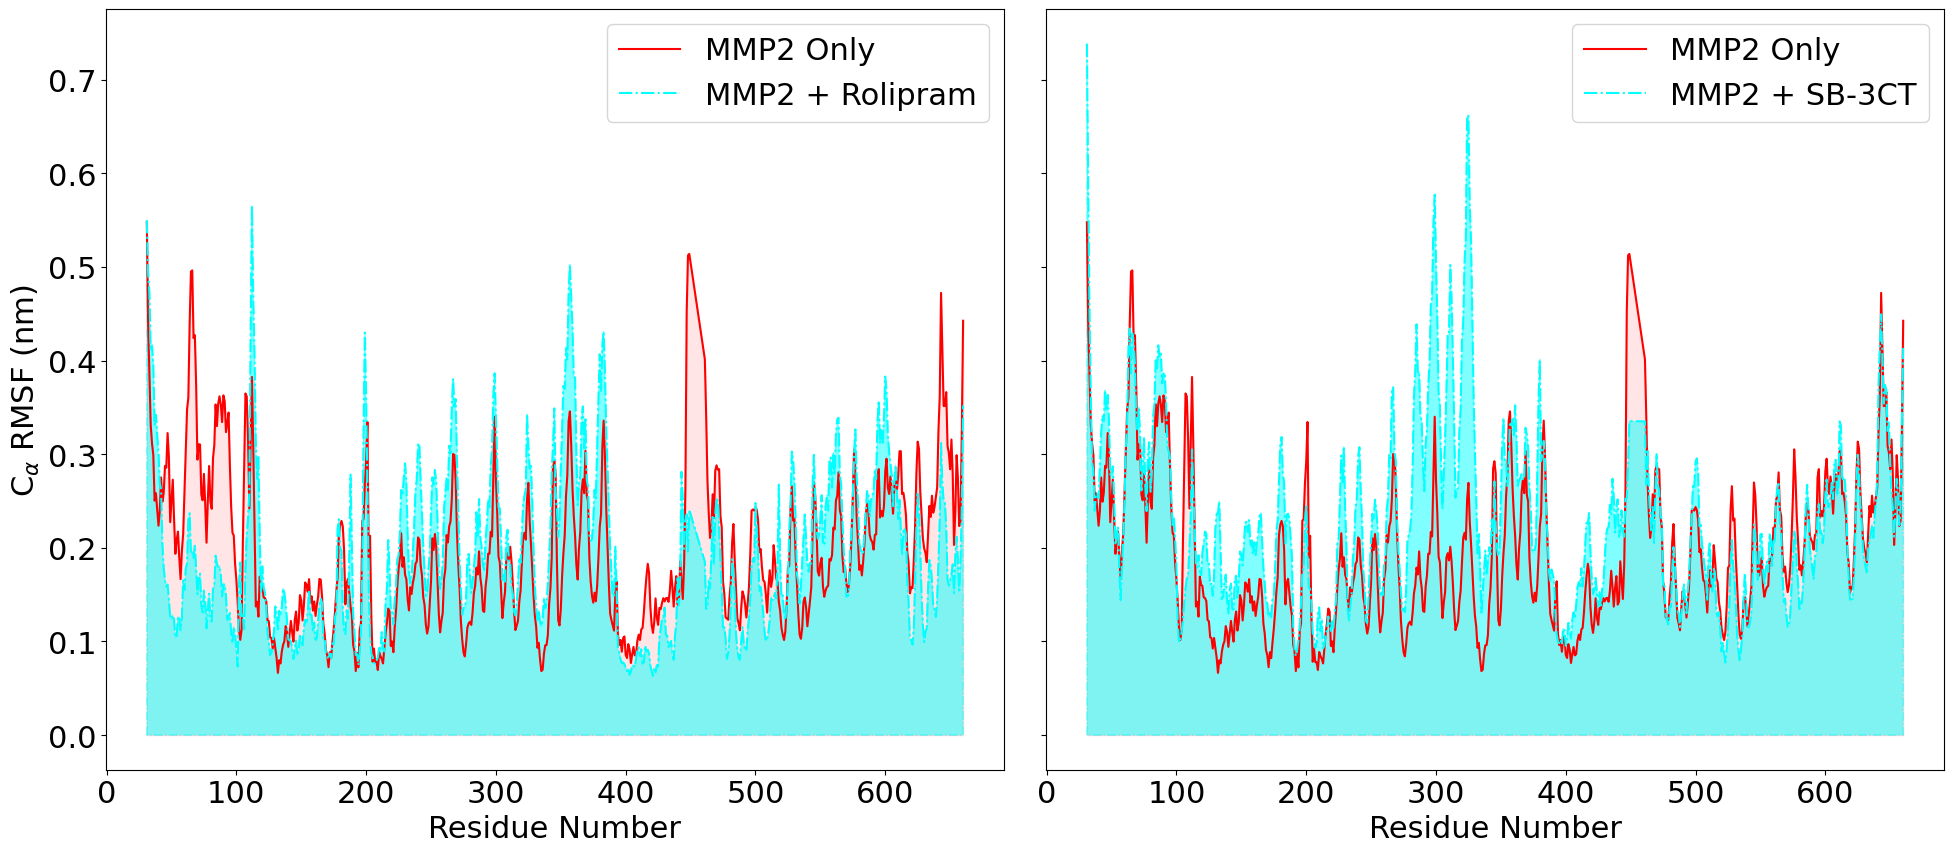

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rc('font', size=22)
fs = 22

res,rmsf_mmp2 = np.loadtxt("MMP2_Rolipram/post-processing/MMP2/rmsf_longer.xvg", comments=["@", "#"], unpack=True)

fig, (ax0, ax1) = plt.subplots(1,2, sharey=True, tight_layout=True, figsize=(20,9))

for ax in (ax0, ax1):
    ax.fill_between(res,rmsf_mmp2, color="red", linestyle="-", alpha=0.1)
    ax.plot(res,rmsf_mmp2, color="red", linestyle="-", label="MMP2 Only")


res,rmsf = np.loadtxt("MMP2_Rolipram/post-processing/Complex/rmsf_pp.xvg", comments=["@", "#"], unpack=True)
ax0.fill_between(res,rmsf, color="cyan", linestyle="-.", alpha=0.5)
ax0.plot(res,rmsf, color="cyan", linestyle="-.", label="MMP2 + Rolipram")


res,rmsf = np.loadtxt("MMP2_sb3ct/post-processing/Complex/rmsf_calpha.xvg", comments=["@", "#"], unpack=True)
ax1.fill_between(res,rmsf, color="cyan", linestyle="-.", alpha=0.5)
ax1.plot(res,rmsf, color="cyan", linestyle="-.", label="MMP2 + SB-3CT")


ax0.set_ylabel(r"C$_\alpha$ RMSF (nm)")



for ax in (ax0, ax1):
    ax.legend(loc="upper right")
    ax.set_xlabel("Residue Number")

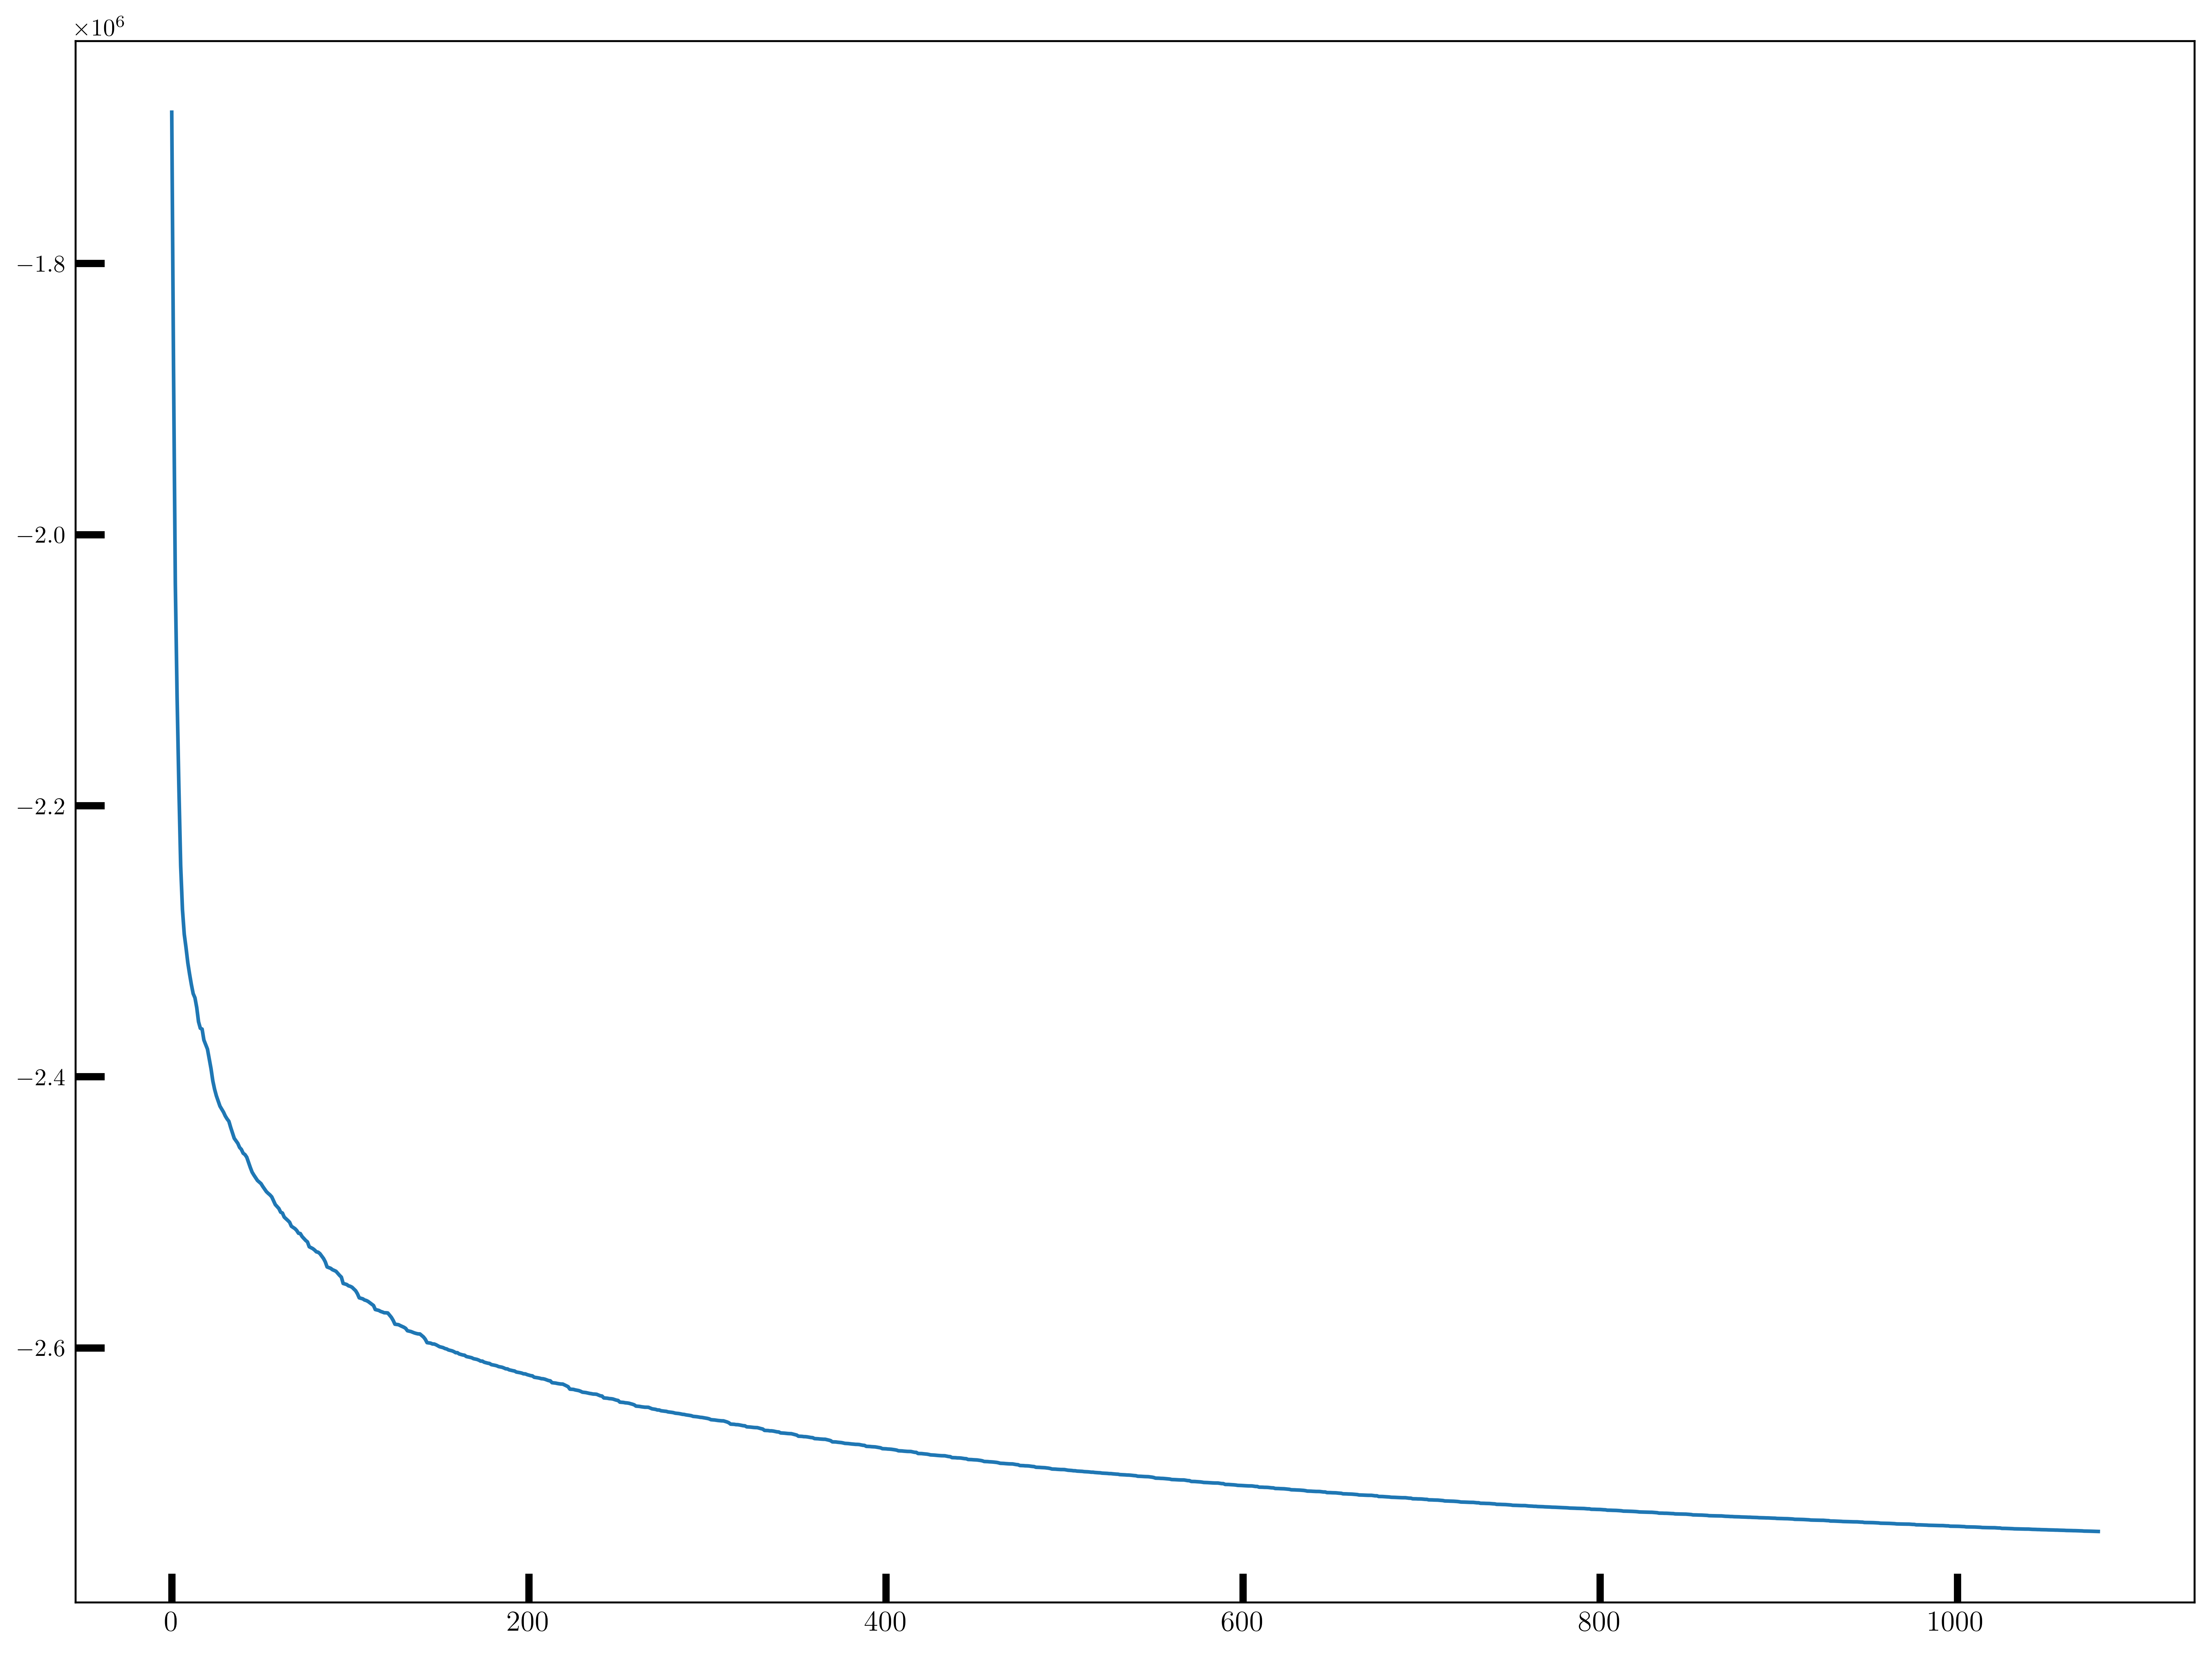

In [3]:
#t3,rg, rgx, rgy, rgz = np.loadtxt(mmp2rol_gyrate, comments=['#','@'], unpack=True)
#ax2.plot(t3/1000, 100 * np.abs(rg-rg[0])/rg[0], label=r"$R_g$", color='red')

#t3,rg, rgx, rgy, rgz = np.loadtxt(mmp2sb3ct_gyrate, comments=['#','@'], unpack=True)
#ax2.plot(t3/1000, 100 * np.abs(rg-rg[0])/rg[0], label=r"$R_g$", color='blue', alpha=0.4)

#ax2.set_ylabel(r"$R_g$")
#ax2.set_ylim((0.0, 10.0))
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2.set_xlabel("time (ns)")